# Milestone 2 - Exploração dos dados
Neste notebook é realizada a análise exploratória aprofundada do dataset **IBM HR Analytics Employee Attrition & Performance**, com o objetivo de identificar padrões relevantes, relações estatísticas entre variáveis e possíveis problemas de qualidade dos dados, no âmbito das fases de Data Understanding e Data Preparation da metodologia CRISP-DM.

Após a contextualização do problema de negócio na Milestone 1, esta fase tem como propósito:

* Analisar a distribuição da variável-alvo e o equilíbrio de classes;
* Explorar relações bivariadas entre variáveis explicativas e o fenómeno de Attrition;
* Identificar correlações relevantes e possíveis multicolinearidades;
* Avaliar a qualidade dos dados (valores em falta, inconsistências e outliers);
* Realizar transformações e engenharia de atributos que acrescentem valor preditivo;
* Preparar um dataset limpo e estruturado para a fase de modelação (Milestone 3).

Esta etapa é fundamental para garantir que os dados utilizados na modelação refletem corretamente a realidade organizacional e que as decisões técnicas são sustentadas por evidência estatística e relevância para o negócio.
# Autores: et al. (realizado por todos)

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Pandas versão:", pd.__version__)
print("NumPy versão:", np.__version__)
print("Matplotlib versão:", plt.matplotlib.__version__)
print("Seaborn versão:", sns.__version__)
# Autores: et al. (realizado por todos)

Pandas versão: 2.3.3
NumPy versão: 2.0.2
Matplotlib versão: 3.10.0
Seaborn versão: 0.13.2


## 2. Carregamento do Dataset

In [2]:
df = pd.read_csv(
    "/kaggle/input/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

print("Dataset carregado com sucesso.")
# Autores: et al. (realizado por todos)

Dataset carregado com sucesso.


## 3. Identificação e Remoção de Variáveis Irrelevantes

In [3]:
# Identificar colunas com variância zero (valor único)
print("Colunas constantes:", df.columns[df.nunique() == 1].tolist())

# Remover variáveis irrelevantes
colunas_remover = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=colunas_remover)

print(f"\nColunas removidas com sucesso. O dataset passou a ter {df.shape[1]} variáveis.")
# Autor: Luís Figueira

Colunas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Colunas removidas com sucesso. O dataset passou a ter 31 variáveis.


# Análise Exploratória de Dados

## Estatística Descritiva e Univariada 

## 4.Criar histogramas e boxplots para variáveis numéricas. 

# Autor: Mateus Afonso

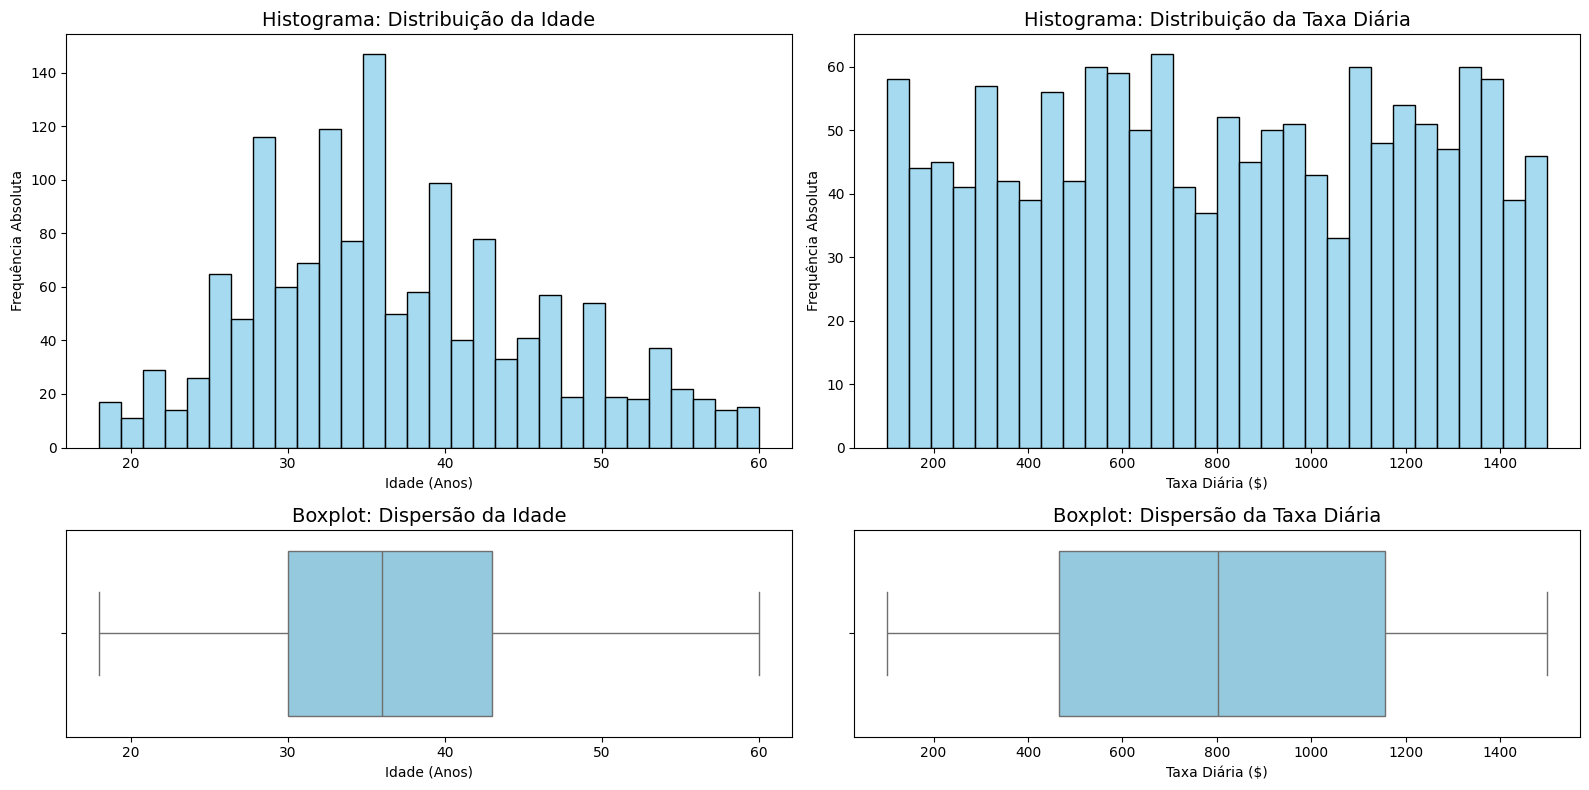

In [4]:
# Criar a grelha 2x2 (2 linhas, 2 colunas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), gridspec_kw={'height_ratios': [2, 1]})

# COLUNA: IDADE (Age)

# Histograma da variável (Age)
sns.histplot(df['Age'], color='skyblue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Histograma: Distribuição da Idade', fontsize=14)
axes[0, 0].set_xlabel('Idade (Anos)')
axes[0, 0].set_ylabel('Frequência Absoluta')

# Boxplot da variável (Age)
sns.boxplot(x=df['Age'], color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot: Dispersão da Idade', fontsize=14)
axes[1, 0].set_xlabel('Idade (Anos)')

# COLUNA: TAXA DIÁRIA (DailyRate)

# Histograma da variável (DailyRate) 
sns.histplot(df['DailyRate'], color='skyblue', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histograma: Distribuição da Taxa Diária', fontsize=14)
axes[0, 1].set_xlabel('Taxa Diária ($)')
axes[0, 1].set_ylabel('Frequência Absoluta')

# Boxplot da variável (DailyRate) 
sns.boxplot(x=df['DailyRate'], color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot: Dispersão da Taxa Diária', fontsize=14)
axes[1, 1].set_xlabel('Taxa Diária ($)')

plt.tight_layout()
plt.show()

# Autor: Mateus Afonso

Text(0.5, 0, 'Idade (Anos)')

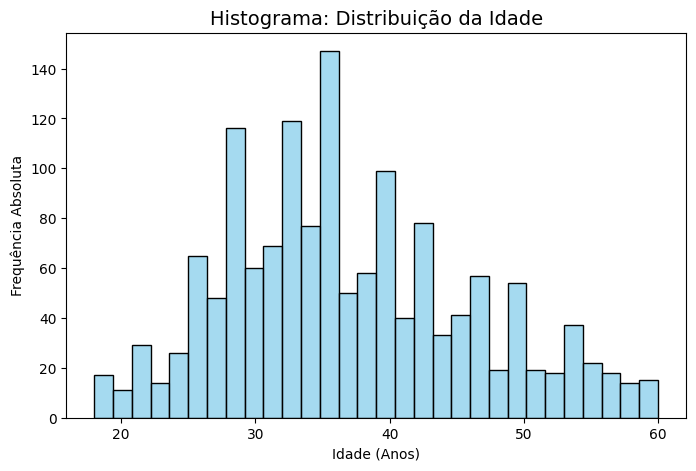

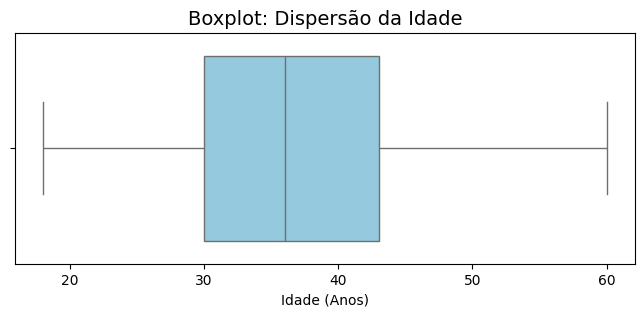

In [5]:
# Histograma da variável (Age) 
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], color='skyblue', bins=30)
plt.title('Histograma: Distribuição da Idade', fontsize=14)
plt.xlabel('Idade (Anos)')
plt.ylabel('Frequência Absoluta')

# Boxplot da variável (Age) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['Age'], color='skyblue') 
plt.title('Boxplot: Dispersão da Idade', fontsize=14)
plt.xlabel('Idade (Anos)')

# Autor: Mateus Afonso

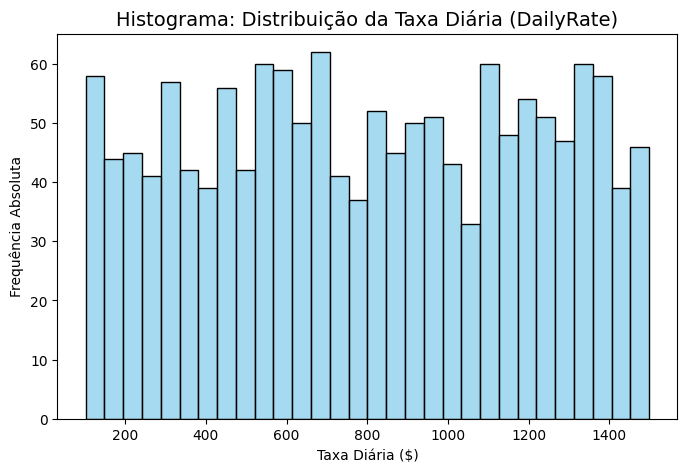

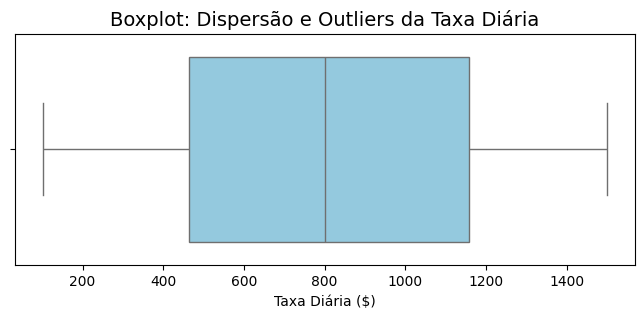

In [6]:
# Histograma da variável (DailyRate) 
plt.figure(figsize=(8, 5))
sns.histplot(df['DailyRate'], color='skyblue', bins=30)
plt.title('Histograma: Distribuição da Taxa Diária (DailyRate)', fontsize=14)
plt.xlabel('Taxa Diária ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (DailyRate) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['DailyRate'], color='skyblue')
plt.title('Boxplot: Dispersão e Outliers da Taxa Diária', fontsize=14)
plt.xlabel('Taxa Diária ($)')
plt.show()

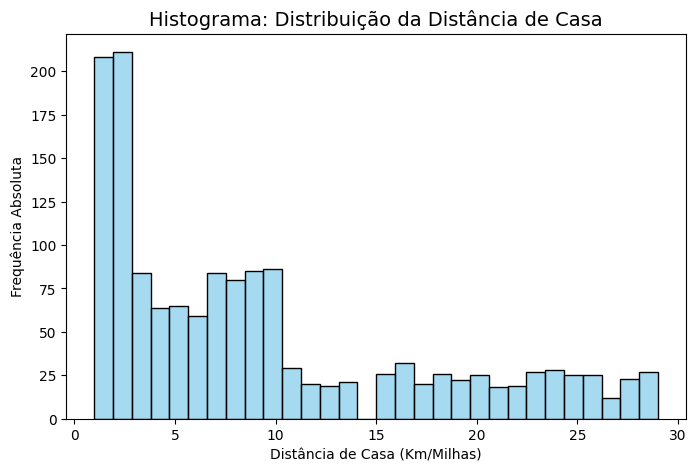

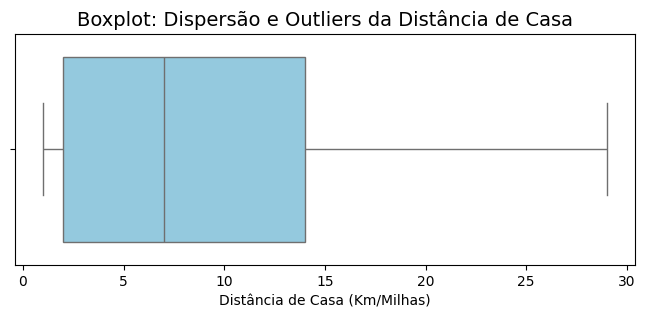

In [7]:
# Histograma da variável (DistanceFromHome) 
plt.figure(figsize=(8, 5))
sns.histplot(df['DistanceFromHome'], color='skyblue', bins=30)
plt.title('Histograma: Distribuição da Distância de Casa', fontsize=14)
plt.xlabel('Distância de Casa (Km/Milhas)')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (DistanceFromHome)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['DistanceFromHome'], color='skyblue')
plt.title('Boxplot: Dispersão e Outliers da Distância de Casa', fontsize=14)
plt.xlabel('Distância de Casa (Km/Milhas)')
plt.show()

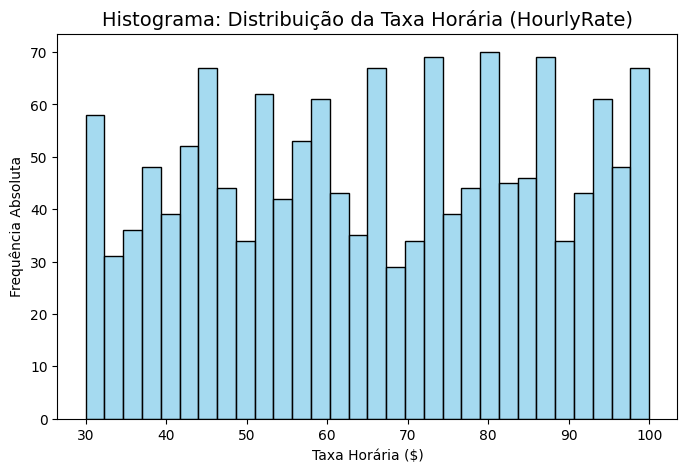

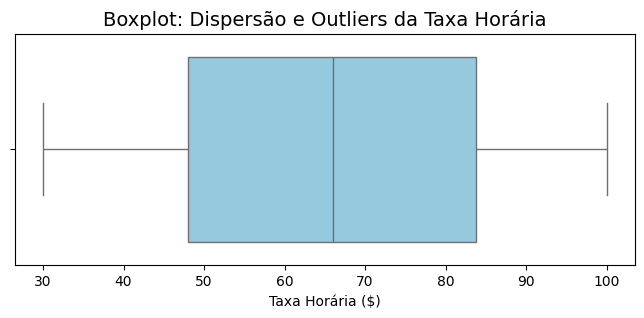

In [8]:
# Histograma da variável (HourlyRate) 
plt.figure(figsize=(8, 5))
sns.histplot(df['HourlyRate'], color='skyblue', bins=30)
plt.title('Histograma: Distribuição da Taxa Horária (HourlyRate)', fontsize=14)
plt.xlabel('Taxa Horária ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (HourlyRate) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['HourlyRate'], color='skyblue')
plt.title('Boxplot: Dispersão e Outliers da Taxa Horária', fontsize=14)
plt.xlabel('Taxa Horária ($)')
plt.show()

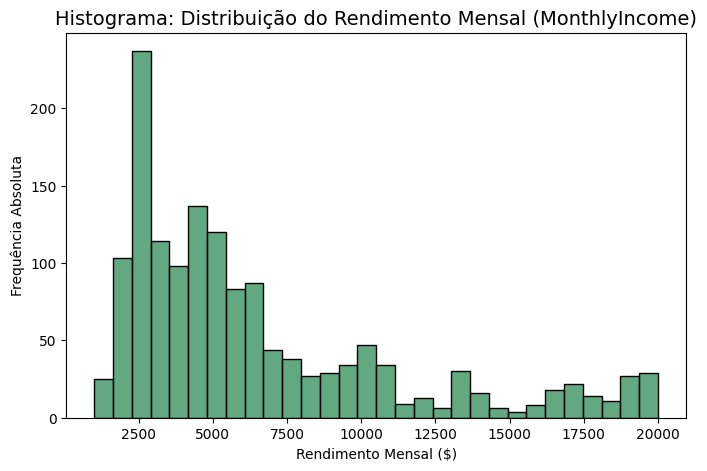

In [9]:
# Histograma dq variável (MonthlyIncome) 
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], color='seagreen', bins=30)
plt.title('Histograma: Distribuição do Rendimento Mensal (MonthlyIncome)', fontsize=14)
plt.xlabel('Rendimento Mensal ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

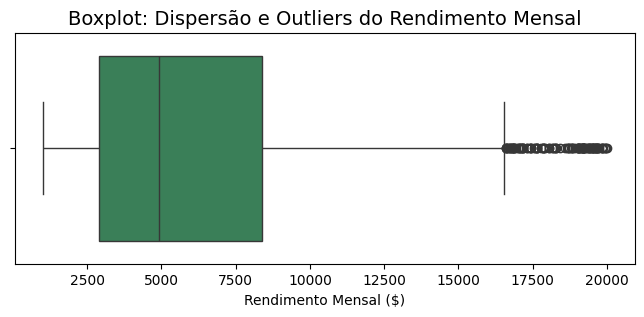

In [10]:
# Boxplot da variável (MonthlyIncome) 
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['MonthlyIncome'], color='seagreen')
plt.title('Boxplot: Dispersão e Outliers do Rendimento Mensal', fontsize=14)
plt.xlabel('Rendimento Mensal ($)')
plt.show()

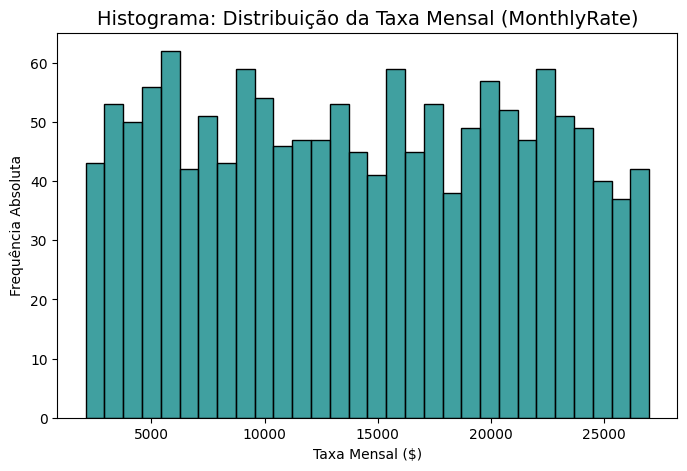

In [11]:
# Histograma da variável (MonthlyRate)
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyRate'], color='teal', bins=30)
plt.title('Histograma: Distribuição da Taxa Mensal (MonthlyRate)', fontsize=14)
plt.xlabel('Taxa Mensal ($)')
plt.ylabel('Frequência Absoluta')
plt.show()

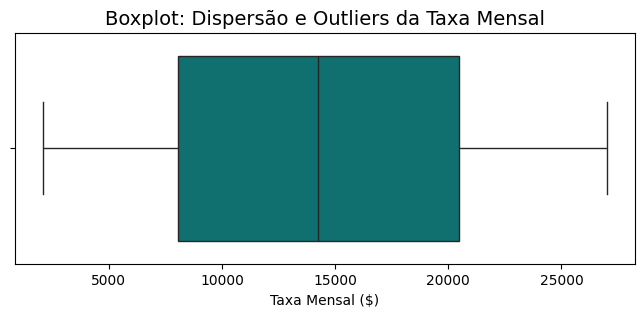

In [12]:
# Boxplot da variável (MonthlyRate)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['MonthlyRate'], color='teal')
plt.title('Boxplot: Dispersão e Outliers da Taxa Mensal', fontsize=14)
plt.xlabel('Taxa Mensal ($)')
plt.show()

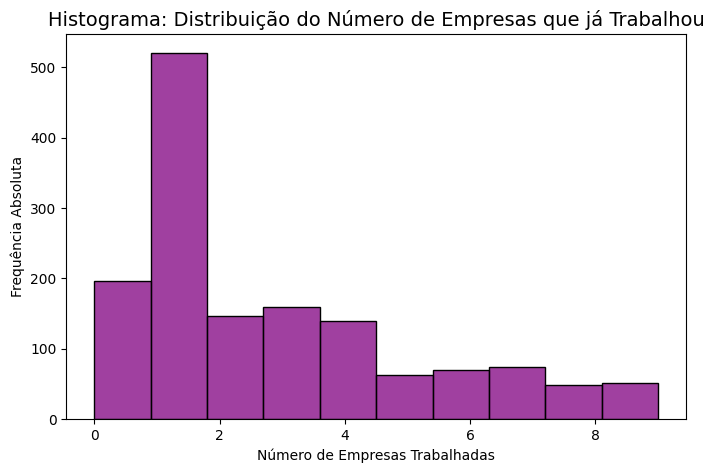

In [13]:
# Histograma da variável (NumCompaniesWorked)
plt.figure(figsize=(8, 5))
sns.histplot(df['NumCompaniesWorked'], color='purple', bins=10)
plt.title('Histograma: Distribuição do Número de Empresas que já Trabalhou', fontsize=14)
plt.xlabel('Número de Empresas Trabalhadas')
plt.ylabel('Frequência Absoluta')
plt.show()

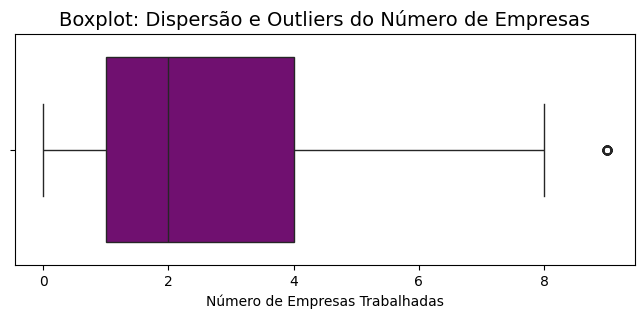

In [14]:
# Boxplot da variável (NumCompaniesWorked)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['NumCompaniesWorked'], color='purple')
plt.title('Boxplot: Dispersão e Outliers do Número de Empresas', fontsize=14)
plt.xlabel('Número de Empresas Trabalhadas')
plt.show()

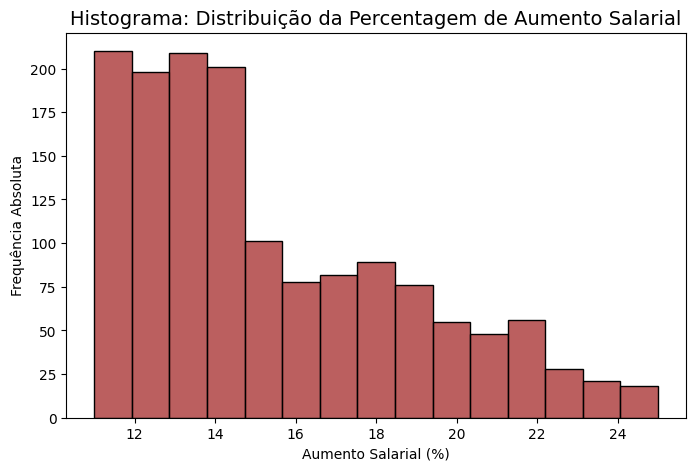

In [15]:
# Histograma da variável (PercentSalaryHike)
plt.figure(figsize=(8, 5))
sns.histplot(df['PercentSalaryHike'], color='brown', bins=15)
plt.title('Histograma: Distribuição da Percentagem de Aumento Salarial', fontsize=14)
plt.xlabel('Aumento Salarial (%)')
plt.ylabel('Frequência Absoluta')
plt.show()

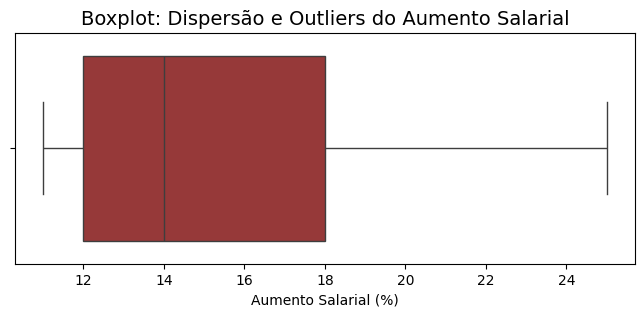

In [16]:
# Boxplot da variável (PercentSalaryHike)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['PercentSalaryHike'], color='brown')
plt.title('Boxplot: Dispersão e Outliers do Aumento Salarial', fontsize=14)
plt.xlabel('Aumento Salarial (%)')
plt.show()

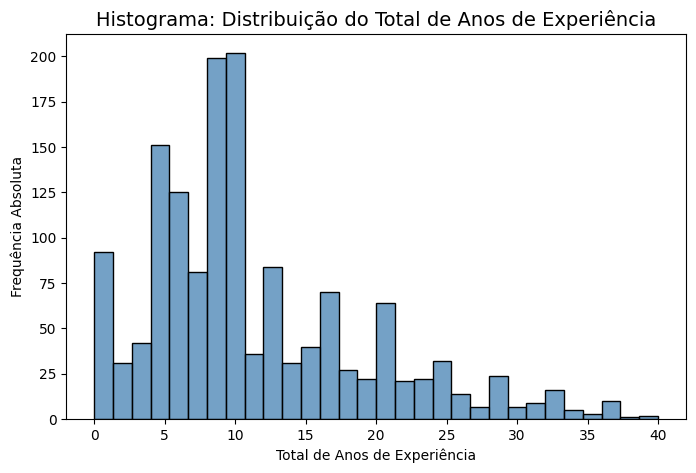

In [17]:
# Histograma da variável (TotalWorkingYears)
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalWorkingYears'], color='steelblue', bins=30)
plt.title('Histograma: Distribuição do Total de Anos de Experiência', fontsize=14)
plt.xlabel('Total de Anos de Experiência')
plt.ylabel('Frequência Absoluta')
plt.show()

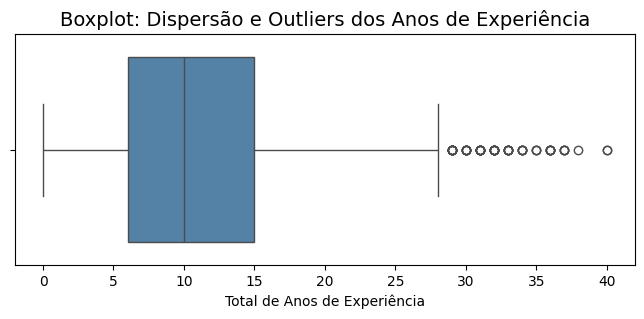

In [18]:
# Boxplot da variável (TotalWorkingYears)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['TotalWorkingYears'], color='steelblue')
plt.title('Boxplot: Dispersão e Outliers dos Anos de Experiência', fontsize=14)
plt.xlabel('Total de Anos de Experiência')
plt.show()

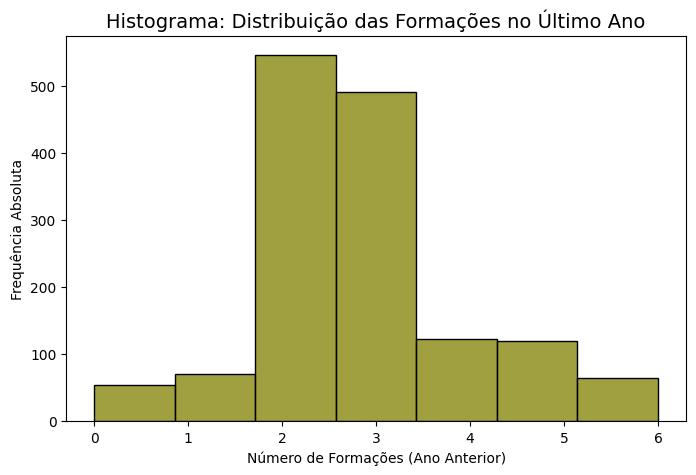

In [19]:
# Histograma da variável (TrainingTimesLastYear)
plt.figure(figsize=(8, 5))
sns.histplot(df['TrainingTimesLastYear'], color='olive', bins=7)
plt.title('Histograma: Distribuição das Formações no Último Ano', fontsize=14)
plt.xlabel('Número de Formações (Ano Anterior)')
plt.ylabel('Frequência Absoluta')
plt.show()

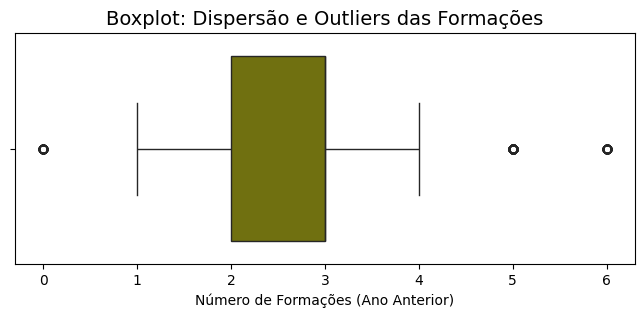

In [20]:
# Boxplot da variável (TrainingTimesLastYear)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['TrainingTimesLastYear'], color='olive')
plt.title('Boxplot: Dispersão e Outliers das Formações', fontsize=14)
plt.xlabel('Número de Formações (Ano Anterior)')
plt.show()

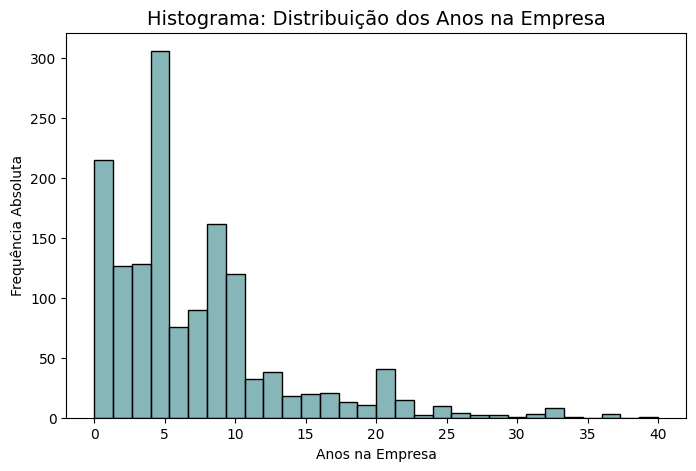

In [21]:
# Histograma da variável (YearsAtCompany)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsAtCompany'], color='cadetblue', bins=30)
plt.title('Histograma: Distribuição dos Anos na Empresa', fontsize=14)
plt.xlabel('Anos na Empresa')
plt.ylabel('Frequência Absoluta')
plt.show()

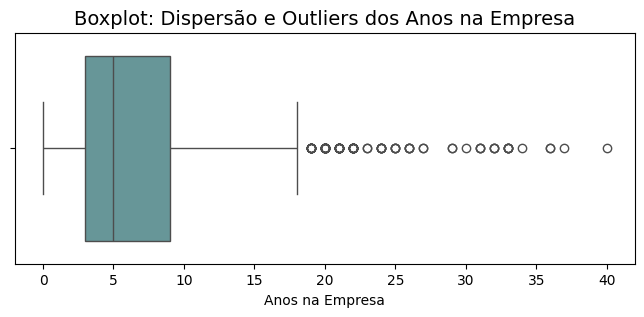

In [22]:
# Boxplot da variável (YearsAtCompany)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsAtCompany'], color='cadetblue')
plt.title('Boxplot: Dispersão e Outliers dos Anos na Empresa', fontsize=14)
plt.xlabel('Anos na Empresa')
plt.show()

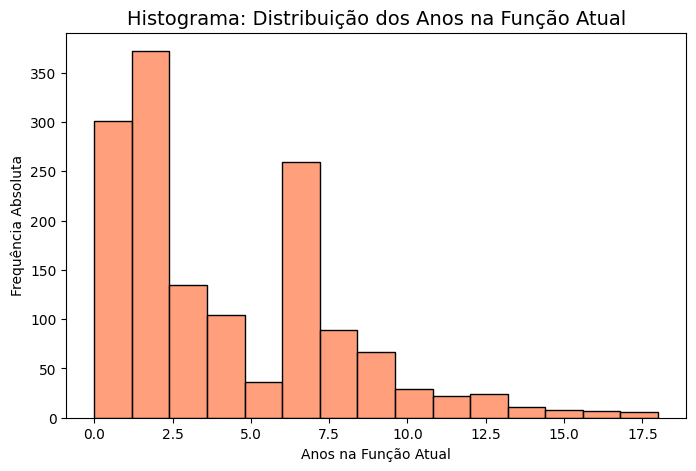

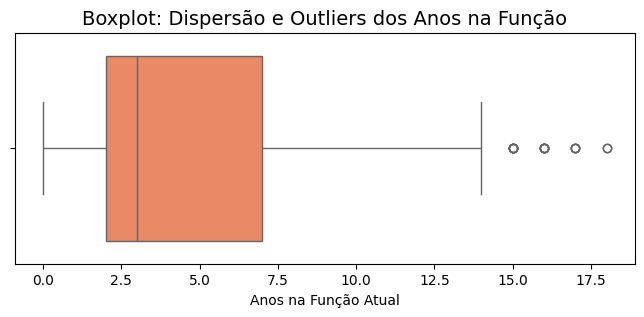

In [23]:
# Histograma da variável (YearsInCurrentRole)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsInCurrentRole'], color='coral', bins=15)
plt.title('Histograma: Distribuição dos Anos na Função Atual', fontsize=14)
plt.xlabel('Anos na Função Atual')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsInCurrentRole)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsInCurrentRole'], color='coral')
plt.title('Boxplot: Dispersão e Outliers dos Anos na Função', fontsize=14)
plt.xlabel('Anos na Função Atual')
plt.show()

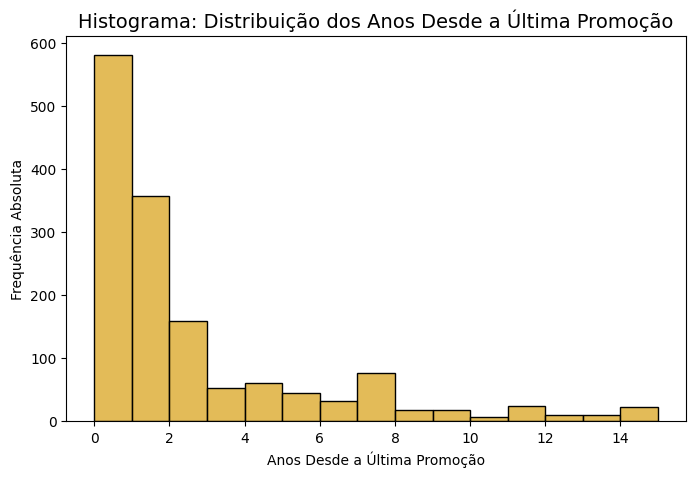

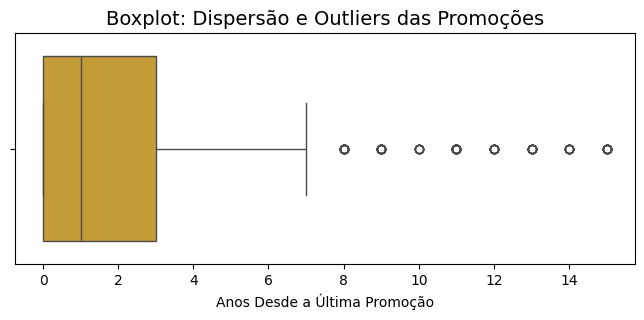

In [24]:
# Histograma da variável (YearsSinceLastPromotion)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsSinceLastPromotion'], color='goldenrod', bins=15)
plt.title('Histograma: Distribuição dos Anos Desde a Última Promoção', fontsize=14)
plt.xlabel('Anos Desde a Última Promoção')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsSinceLastPromotion)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsSinceLastPromotion'], color='goldenrod')
plt.title('Boxplot: Dispersão e Outliers das Promoções', fontsize=14)
plt.xlabel('Anos Desde a Última Promoção')
plt.show()

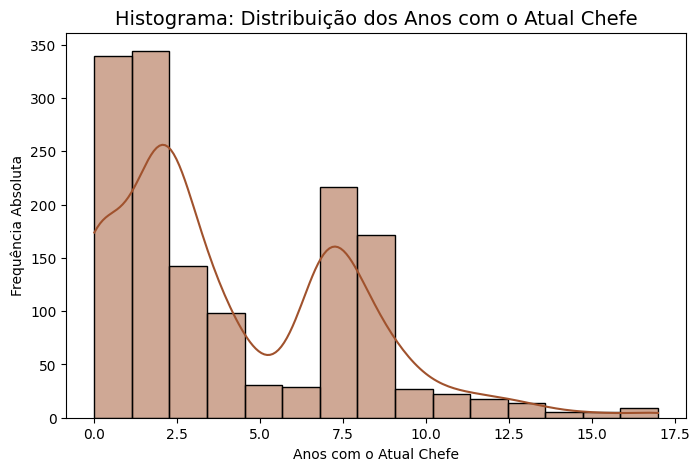

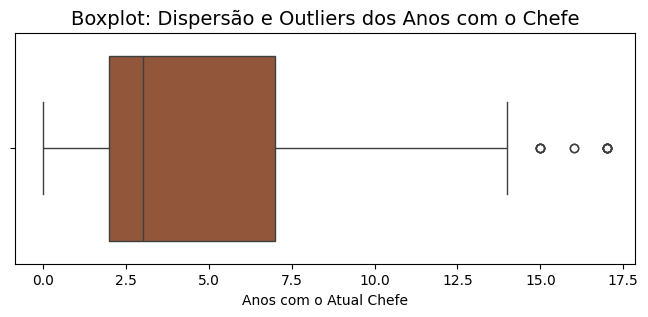

In [25]:
# Histograma da variável (YearsWithCurrManager)
plt.figure(figsize=(8, 5))
sns.histplot(df['YearsWithCurrManager'], kde=True, color='sienna', bins=15)
plt.title('Histograma: Distribuição dos Anos com o Atual Chefe', fontsize=14)
plt.xlabel('Anos com o Atual Chefe')
plt.ylabel('Frequência Absoluta')
plt.show()

# Boxplot da variável (YearsWithCurrManager)
plt.figure(figsize=(8, 3)) 
sns.boxplot(x=df['YearsWithCurrManager'], color='sienna')
plt.title('Boxplot: Dispersão e Outliers dos Anos com o Chefe', fontsize=14)
plt.xlabel('Anos com o Atual Chefe')
plt.show()

## 10. Tratamento de Dados em Falta

In [26]:
missing_percentage = df.isnull().mean() * 100

missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage (%)': missing_percentage
}).sort_values(by='Missing_Percentage (%)', ascending=False)

missing_df
# Autor: Martim Ferreira

,Missing_Count,Missing_Percentage (%)
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EnvironmentSatisfaction,0,0.0
Gender,0,0.0


## 11. Tratamento de Outliers e Erros nos dados

In [27]:
num_df = df.select_dtypes(include=[np.number])

def detect_outliers_iqr(data):
    outlier_summary = {}

    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        
        outlier_summary[col] = len(outliers)
    
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count']).sort_values(by='Outlier_Count', ascending=False)

outliers_df = detect_outliers_iqr(num_df)
outliers_df[outliers_df['Outlier_Count'] > 0]
# Autor: Martim Ferreira

,Outlier_Count
TrainingTimesLastYear,238
PerformanceRating,226
MonthlyIncome,114
YearsSinceLastPromotion,107
YearsAtCompany,104
StockOptionLevel,85
TotalWorkingYears,63
NumCompaniesWorked,52
YearsInCurrentRole,21
YearsWithCurrManager,14
